<div style="display:block"><br><br>
    <div style="display:block" align=left display=block>
        <font size=5><b>Day5 - HandsOn2</b></font><br>
        <hr/>

</div>

<pre>
.
├── Part 0: Import Necessary Libraries
|
└── Part 1: Multioutput Regression + Correlogram Diagram
    |
    ├── Dataset
    |
    ├── Correlation Analysis
    |
    └── Multioutput Regression
:
└── Part 2: Support Vector Regression (SVR)
    |
    ├── LinearSVR
    |
    ├── SVR with Polynomial Kernel
    |
    └── California Housing Problem

</pre>

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!

# Part 0: Import Necessary Libraries

We import the necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Multioutput Regression + Correlogram Diagram

## Dataset

Before proceeding with any analysis, it is essential to become thoroughly familiar with the dataset. The dataset of interest in this case is located in the concrete.csv file. Concrete is a composite material of varying complexity, composed of a binding agent, such as cement, water, and other aggregates. The flow of concrete, or its ability to be molded and shaped, is not only determined by the water content, but it is also influenced by the other concrete ingredients. Therefore, it is necessary to examine the multivariate concrete dataset in detail to understand the relationships between the variables. The dataset comprises 103 observations, with each observation representing a batch of concrete ingredient measurements and test results. By analyzing this dataset, we can gain valuable insights into the factors that contribute to the slump flow of concrete, and improve our understanding of this complex material.


There are 7 predictors and 3 response variables. All predictors are measured in kgs/m3. Slump and Flow are measured in cm, while Compressive Strength is measured in MPa.

Input variables (7) (component kg in one M^3 concrete):
- Cement
- Slag
- Fly ash
- Water
- SP
- Coarse Aggr.
- Fine Aggr.

Output variables (3):
- SLUMP (cm)
- FLOW (cm)
- 28-day Compressive Strength (Mpa)

Read dataset in code cell below

In [ ]:
# Read Dataset
df = pd.read_csv('concrete.csv', index_col=0)
df

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,slump,flow,compressive_strength
id,,,,,,,,,,
1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
100,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
101,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50


## Correlation Analysis

Correlation analysis, also known as bivariate analysis, is a statistical technique that is primarily concerned with finding out whether a relationship exists between two variables and then determining the magnitude and direction of that relationship. The technique involves measuring the degree to which the two variables are related and can be used to identify patterns and trends in large amounts of data.

A correlation of -1.0 indicates a perfect negative correlation, which means that as one variable increases, the other variable decreases. Conversely, a correlation of 1.0 indicates a perfect positive correlation, which means that as one variable increases, the other variable also increases.

Correlation analysis is a powerful tool for data analysis and can be used in a variety of fields, including finance, economics, psychology, and biology, among others. It can help researchers and analysts to understand the relationships between variables and to make informed decisions based on their findings.

In summary, correlation analysis is an essential statistical technique that can help analysts and researchers to identify relationships between variables. The technique can be used to identify patterns and trends in large amounts of data, and it is a powerful tool for data analysis across a wide range of fields.

### 💭 Questions

- Calculate correlation among all input/output vairables
- Plot correlation values
- Is there highly correlated relation among inputs?
- Is there high correlation between one of inputs and outputs?
- For see more detailed view draw correlegram diagram

**HINT**: Use seaborn for drawing plots in this part

<AxesSubplot:>

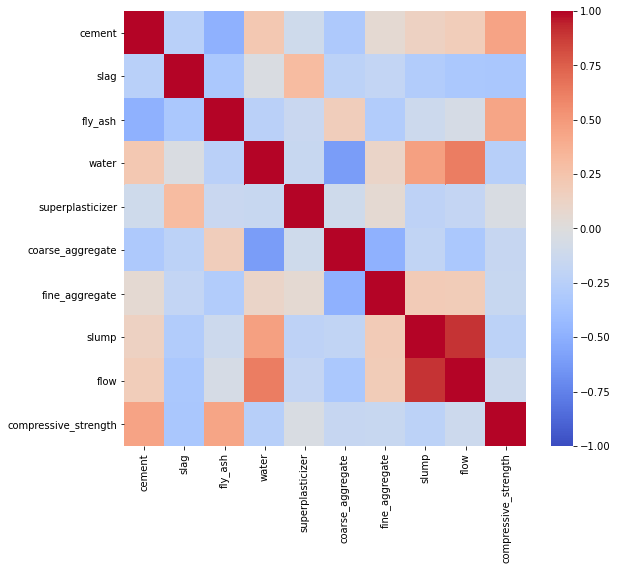

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm')

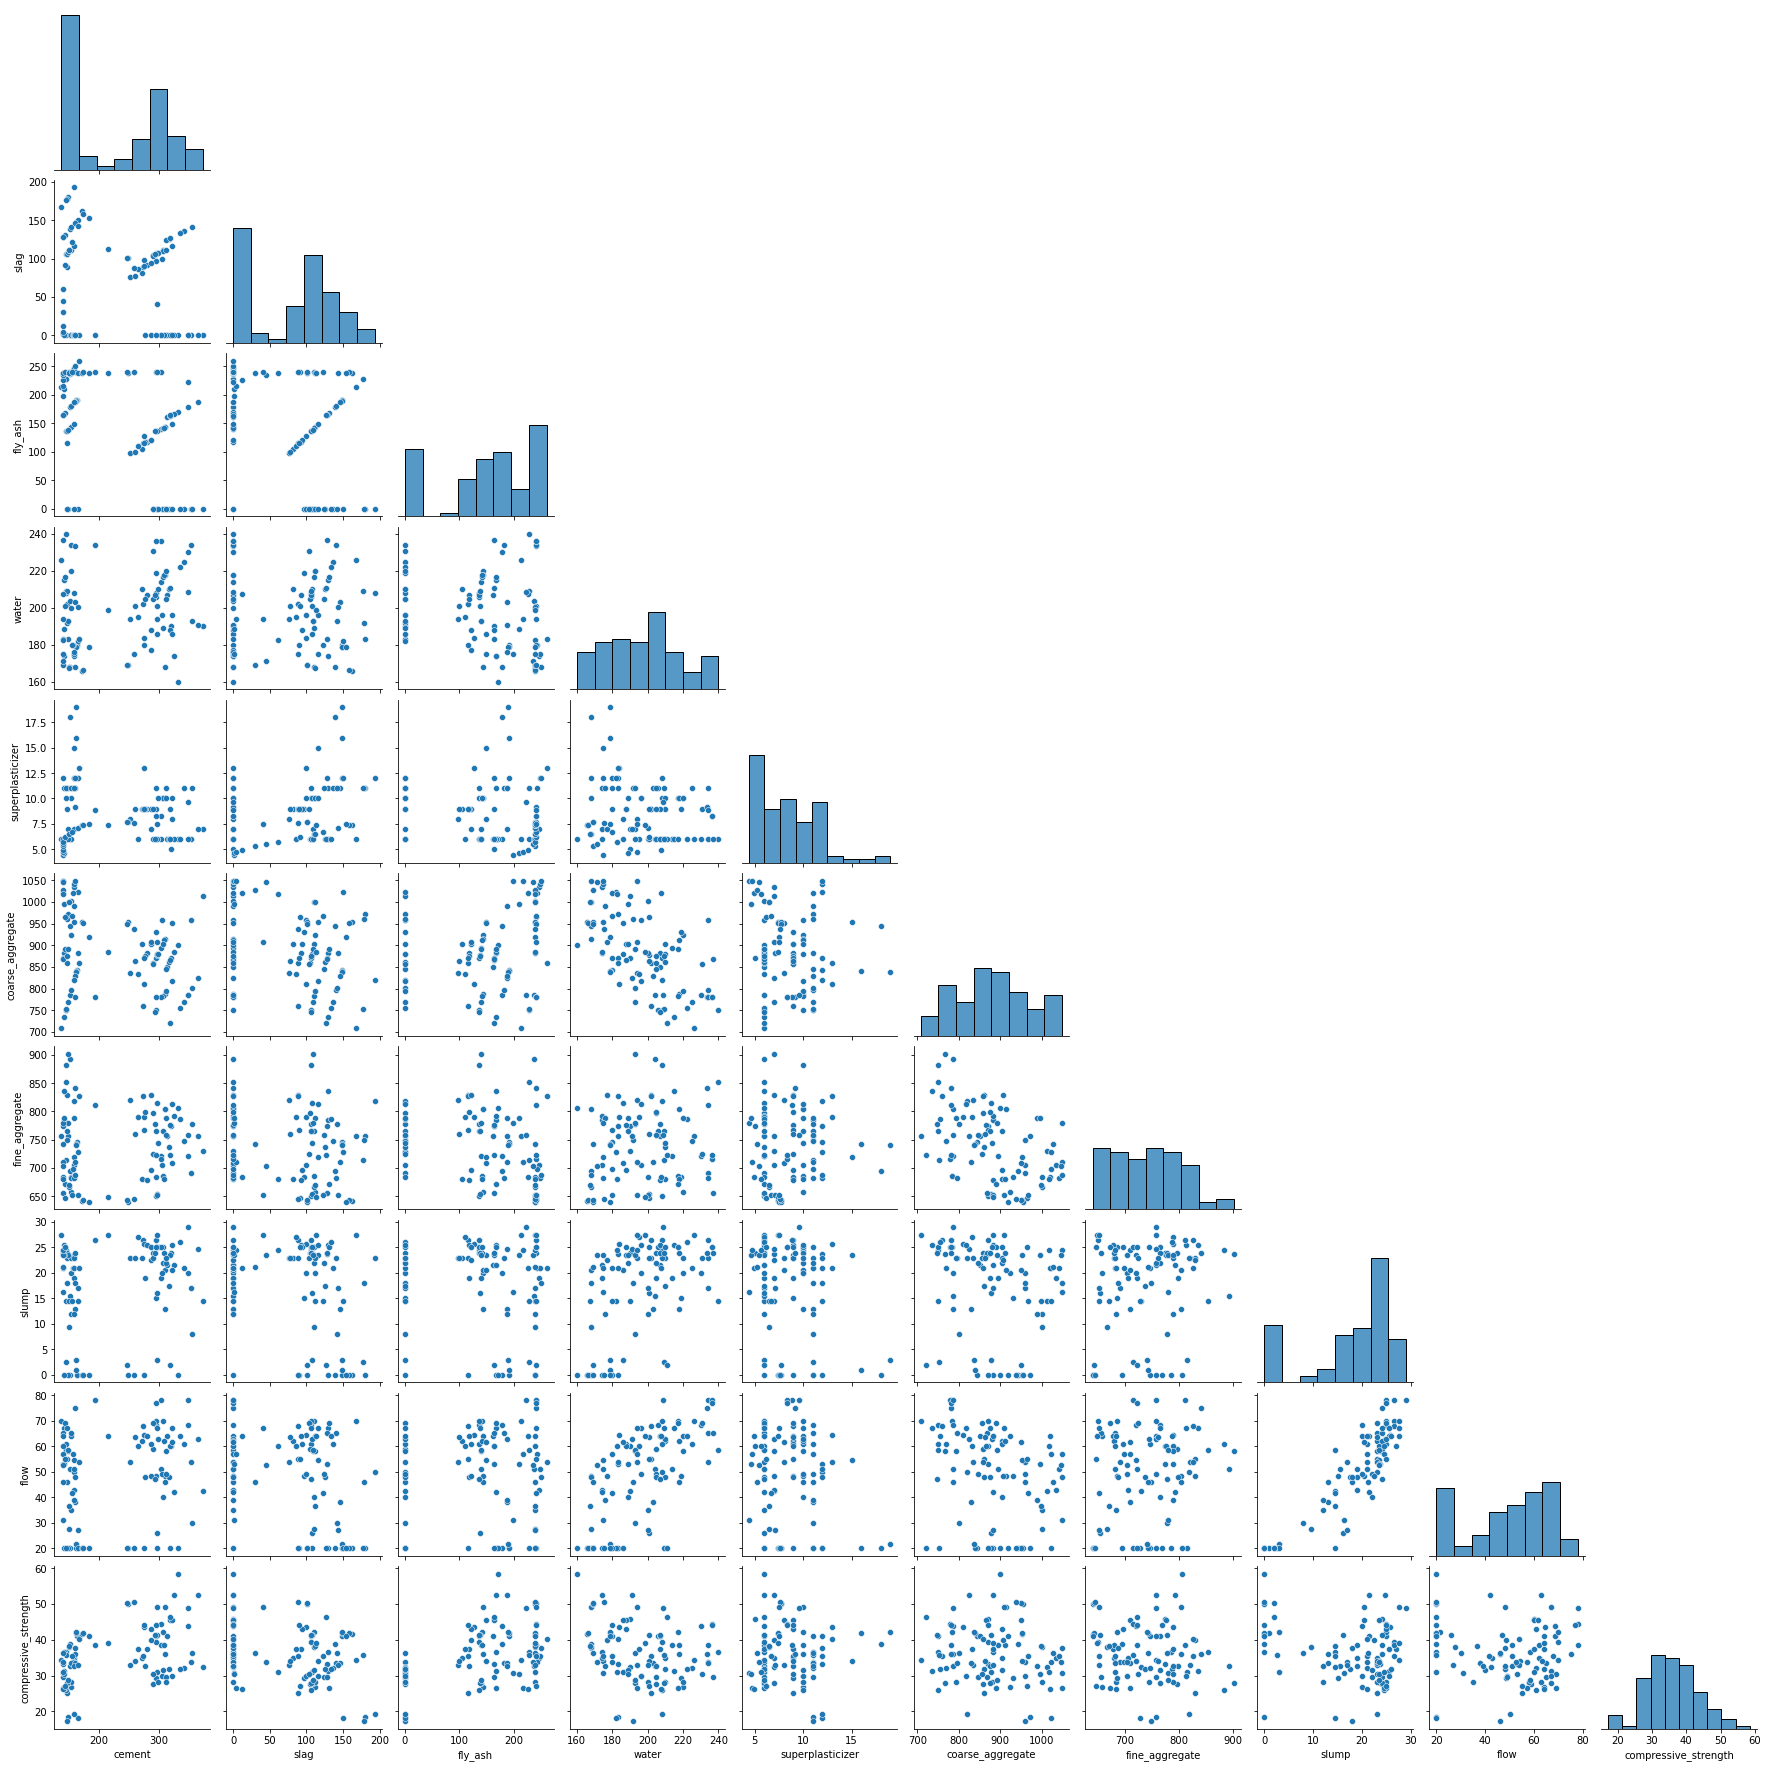

In [ ]:
sns.pairplot(df, corner=True)

## Multioutput Regression

### 💭 Questions
- Seperate feature and target vectors and save them in variables called `X` and `y`.
- Split data to Train and Test with proportion of 80 to 20.
- Normalizing the feature variables using `StandardScaler`
- Train linear regression model and calculate MSE
- Draw scatter plot between coefficient of input variable and its correlation with target variables

In [ ]:
# seperate feature vectors and target variables
X = df.iloc[:, :-3]
y = df.iloc[:, -3:]

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# normalize feature vectors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# train linear regression
# calculate mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train_scaled, y_train)

y_pred = reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 78.817


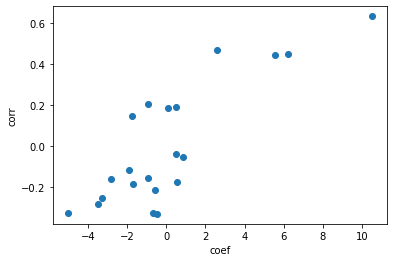

In [ ]:
# draw scatter plot (coef vs corr)
plt.scatter(reg.coef_, df.corr().iloc[-3:, :-3].to_numpy())
plt.xlabel('coef')
plt.ylabel('corr')
plt.show()

# Part 2: Support Vector Regression (SVR)

Support Vector Regression (SVR) is an advanced machine learning algorithm used for regression analysis. It is a modification of the Support Vector Machine (SVM) algorithm, which is primarily used for classification tasks. The primary goal of SVR is to predict a continuous outcome variable, such as a stock price, based on a set of input variables, such as market trends and economic indicators.

One of the key differences between SVR and traditional linear regression methods is that SVR finds a hyperplane that best fits the data points in a continuous space, instead of fitting a line to the data points. This allows SVR to capture more complex relationships between the input variables and the outcome variable, making it a more powerful tool for regression analysis.

In summary, Support Vector Regression is a powerful machine learning algorithm that enables you to predict a continuous outcome variable based on a set of input variables. It is particularly useful for modeling non-linear relationships between variables and provides the flexibility to adjust the model's robustness by tuning hyperparameters. With its wide range of applications and flexibility, SVR is an essential tool for any data scientist or machine learning practitioner.

## LinearSVR

### Dataset

Create 100 sampled data according to below formula:
$$y=3x+4+\mathcal{N}(0, 2), x\in[0, 2)$$

where $\mathcal{N}(0, 2)$ is normal distribution with mean equals to 0 and variance equals to 2.

#### 💭 Questions
- Create dataset and save them in variables called `X` and `y`.
- Split data to Train and Test with proportion of 80 to 20.

In [ ]:
# create dataset
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)
y = (4 + 3 * X + 2*np.random.randn(n_samples, 1)).ravel()

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train Model

#### 💭 Questions
- Train LinearSVR model with `epsilon` equals to `1.0` and calcualte MSE
- Define function for plot LinearSVR model
  - Plot LinearSVR line
  - Plot TRUE regression line
  - Plot training data
  - Plot support vectors of LinearSVR (optional)

In [ ]:
# train LinearSVR
# calculate mse
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

svr = LinearSVR(epsilon=1.0)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 2.522


In [ ]:
# define plot_svr function
def plot_svr(svr, X, y):
    x1s = np.linspace(0, 2, 100).reshape(100, 1)
    y_pred = svr.predict(x1s)

    plt.plot(x1s, 3*x1s+4, "g-", linewidth=2, label='True Answer')

    plt.plot(x1s, y_pred, "k-", linewidth=2, label='SVR')
    plt.plot(x1s, y_pred + svr.epsilon, "k--")
    plt.plot(x1s, y_pred - svr.epsilon, "k--")

    y_pred = svr.predict(X_train)
    off_margin = np.argwhere(np.abs(y_train - y_pred) >= svr.epsilon)

    plt.scatter(X[off_margin], y[off_margin], s=120, facecolors='#FFAAAA')

    plt.scatter(X, y)
    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend()

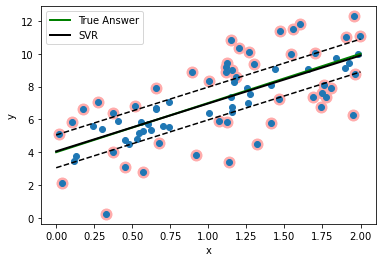

In [ ]:
# plot trained model
plot_svr(svr, X_train, y_train)

#### 💭 Questions
- Train LinearSVR model with three different `epsilon` values. (`0.5`, `1.0`, `1.5`)
- Plot trained models using function you have defined in pervious section
- Find best `epsilon` value try value between 0.1 to 1.5
- Train LinearSVR model with best `epsilon` value, calculate MSE

Text(0.5, 1.0, 'epsilon: 1.50')

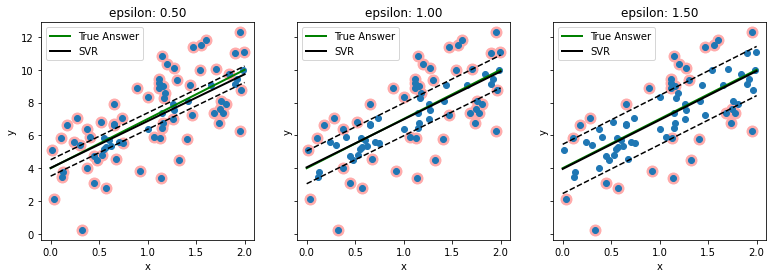

In [ ]:
# train LinearSVR models
# plot models in single figure
fig, axes = plt.subplots(ncols=3, figsize=(13, 4), sharey=True)

svr1 = LinearSVR(epsilon=0.5)
svr1.fit(X_train, y_train)

plt.sca(axes[0])
plot_svr(svr1, X_train, y_train)
plt.title('epsilon: %.2f' % svr1.epsilon)

svr2 = LinearSVR(epsilon=1.0)
svr2.fit(X_train, y_train)

plt.sca(axes[1])
plot_svr(svr2, X_train, y_train)
plt.title('epsilon: %.2f' % svr2.epsilon)

svr3 = LinearSVR(epsilon=1.5)
svr3.fit(X_train, y_train)

plt.sca(axes[2])
plot_svr(svr3, X_train, y_train)
plt.title('epsilon: %.2f' % svr3.epsilon)

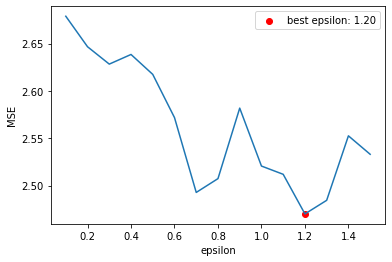

In [ ]:
# find best epsilon
epsilons = np.linspace(0.1, 1.5, 15)
mse_list = []
for e in epsilons:
    svr = LinearSVR(epsilon=e)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

plt.plot(epsilons, mse_list)
plt.xlabel('epsilon')
plt.ylabel('MSE')

best_epsilon_idx = np.argmin(mse_list)

plt.scatter(epsilons[best_epsilon_idx], mse_list[best_epsilon_idx],
            c='red', label='best epsilon: %.2f' % epsilons[best_epsilon_idx])

plt.legend()

plt.show()

In [ ]:
# train LinearSVR model with best epsilon
svr = LinearSVR(epsilon=epsilons[best_epsilon_idx])
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 2.470


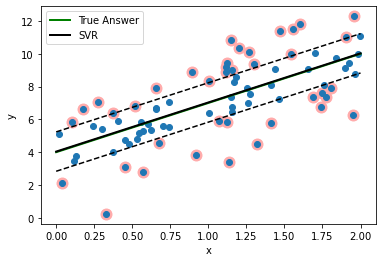

In [ ]:
# plot model
plot_svr(svr, X_train, y_train)

## SVR with Polynomial Kernel

### Dataset

Create 100 sampled data according to below formula:
$$y=0.5x^2+0.1x+0.2+\mathcal{N}(0, 0.1), x\in[-1, 1)$$

where $\mathcal{N}(0, 0.1)$ is normal distribution with mean equals to 0 and variance equals to 0.1.

#### 💭 Questions
- Create dataset and save them in variables called `X` and `y`.
- Split data to Train and Test with proportion of 80 to 20.

In [ ]:
# create dataset
n_samples = 100
X = 2 * np.random.rand(n_samples, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(n_samples, 1)*0.1).ravel()

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train Model

#### 💭 Questions
- Train SVR model with 2nd order polynomial kernel and calculate MSE
- Define function for plot LinearSVR model
  - Plot SVR curveture
  - Plot TRUE regression curveture
  - Plot training data
  - Plot support vectors of SVR (optional)
- Train SVR model with three different `C` values. (`1`, `10`, `100`)
- Plot trained models using function you have defined

In [ ]:
# train SVR model
# calculate mse
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR(kernel="poly", degree=2, C=1, epsilon=0.1, gamma="scale")
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.017


In [ ]:
# define plot_poly_svr function
def plot_poly_svr(svr, X, y):
    x1s = np.linspace(-1, 1, 100).reshape(100, 1)
    y_pred = svr.predict(x1s)

    plt.plot(x1s, 0.5*(x1s**2)+0.1*x1s+ 0.2, "g-", linewidth=2, label='True Answer')

    plt.plot(x1s, y_pred, "k-", linewidth=2, label='SVR')
    plt.plot(x1s, y_pred + svr.epsilon, "k--")
    plt.plot(x1s, y_pred - svr.epsilon, "k--")

    y_pred = svr.predict(X_train)
    off_margin = np.argwhere(np.abs(y_train - y_pred) >= svr.epsilon)

    plt.scatter(X[off_margin], y[off_margin], s=120, facecolors='#FFAAAA')

    plt.scatter(X, y)
    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend()

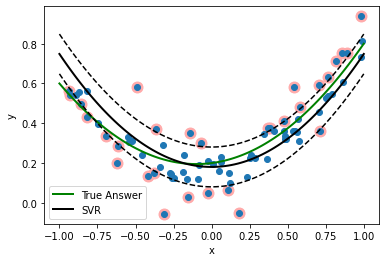

In [ ]:
# plot model
plot_poly_svr(svr, X_train, y_train)

Text(0.5, 1.0, 'C: 100.00')

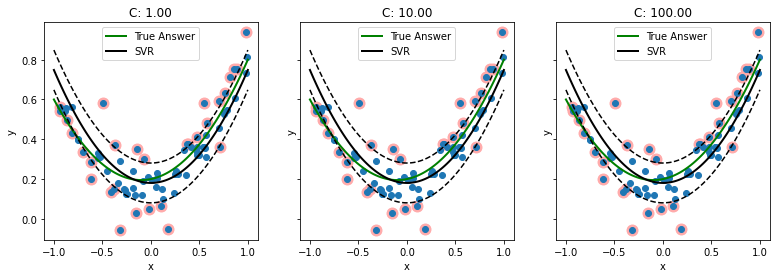

In [ ]:
# train SVR models
# plot models in single figure
fig, axes = plt.subplots(ncols=3, figsize=(13, 4), sharey=True)

svr1 = SVR(kernel="poly", degree=2, C=1, epsilon=0.1, gamma="scale")
svr1.fit(X_train, y_train)

plt.sca(axes[0])
plot_poly_svr(svr1, X_train, y_train)
plt.title('C: %.2f' % svr1.C)

svr2 = SVR(kernel="poly", degree=2, C=10, epsilon=0.1, gamma="scale")
svr2.fit(X_train, y_train)

plt.sca(axes[1])
plot_poly_svr(svr2, X_train, y_train)
plt.title('C: %.2f' % svr2.C)

svr3 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svr3.fit(X_train, y_train)

plt.sca(axes[2])
plot_poly_svr(svr3, X_train, y_train)
plt.title('C: %.2f' % svr3.C)

## California Housing Problem

## Dataset

Before starting any data analysis or modeling task, it is crucial to become familiar with the dataset that you will be working with.In this case, we will be working with the California Housing dataset, which is a popular benchmark dataset for regression tasks. This dataset is widely used in machine learning and data science courses as well as research, and it is available in the scikit-learn library. The California Housing dataset contains measurements of various features that are used to estimate the median house value (`MedHouseVal`) in California

Here's some information about the California Housing dataset:
- Samples total: 20640
- Dimensionality: 8
- Features: real
- Target: real (0.15 - 5)

### 💭 Questions
- Load dataset using `fetch_california_housing` in sklearn
- Create features and target dataframes
- Split data to Train and Test with proportion of 80 to 20.
- Normalizing the feature variables using `StandardScaler`

In [ ]:
# load dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [ ]:
# create features dataframe
X_df = pd.DataFrame(housing.data, columns=housing['feature_names'])
X_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# create target dataframe
y_df = pd.DataFrame(housing.target, columns=housing['target_names'])
y_df

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df.to_numpy(), y_df.to_numpy().ravel(), test_size=0.2)

In [ ]:
# normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Models

### 💭 Questions
- Train LinearSVR model using normalized data and calculate MSE
- Did you get ConvergenceWarning? What is wrong?

In [ ]:
# train LinearSVR model
# calcualte mse
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

lin_svr = LinearSVR()
lin_svr.fit(X_train_scaled, y_train)

y_pred = lin_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.578


/home/mersad/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 💭 Questions
- Train SVR model with RBF kernel using normalized data and calculate MSE
- Compare the result with pervious cell

In [ ]:
# train SVR model
# calculate mse
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

rbf_svr = SVR(kernel='rbf', C=1.0, gamma='scale')
rbf_svr.fit(X_train_scaled, y_train)

y_pred = rbf_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.308


## Hyperparameter Tunning

Hyperparameter tuning is a critical step in machine learning that involves selecting the best set of hyperparameters for your model to achieve optimal performance. Hyperparameters are parameters that are set before training and affect the learning process, such as the learning rate or regularization strength.

To find the best combination of hyperparameters, you need to run multiple training iterations with different hyperparameter values and evaluate the performance of each iteration. This process can be time-consuming and computationally expensive, especially for large datasets or complex models.

Fortunately, Google Cloud provides a powerful infrastructure for hyperparameter tuning that can save you time and resources. With Google Cloud, you can run multiple training jobs in parallel, each with a different set of hyperparameters, and quickly evaluate their performance. This allows you to quickly identify the best set of hyperparameters for your model and achieve optimal performance.

- Use `RandomizedSearchCV` to tune `gamma` and `C` parameters
  - $\text{gamma}\in(0.01, 0.1)$ with reciprocal distribution
  - $\text{C}\in(1, 10)$ with uniform distribution
- Train SVR model with RBF kernel and best parameters obtained from pervious part and calcualte MSE

In [ ]:
# hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.01, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train)
#~10min read something for fun :)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=10.371124020885826, gamma=0.03323360241196228; total time=  17.3s
[CV] END ....C=10.371124020885826, gamma=0.03323360241196228; total time=  23.9s
[CV] END ....C=10.371124020885826, gamma=0.03323360241196228; total time=  19.1s
[CV] END ......C=2.416331620685851, gamma=0.0341477750800528; total time=  15.4s
[CV] END ......C=2.416331620685851, gamma=0.0341477750800528; total time=  12.7s
[CV] END ......C=2.416331620685851, gamma=0.0341477750800528; total time=  16.0s
[CV] END ....C=1.0597046729434103, gamma=0.05540395186804367; total time=  11.7s
[CV] END ....C=1.0597046729434103, gamma=0.05540395186804367; total time=  12.7s
[CV] END ....C=1.0597046729434103, gamma=0.05540395186804367; total time=  11.4s
[CV] END .....C=4.806907848978795, gamma=0.09516007677719664; total time=  13.4s
[CV] END .....C=4.806907848978795, gamma=0.09516007677719664; total time=  13.7s
[CV] END .....C=4.806907848978795, gamma=0.09516

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f22da8feaf0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f22d29dc7f0>},
                   verbose=2)

In [ ]:
rnd_search_cv.cv_results_

{'mean_fit_time': array([15.63592323, 11.06819479,  8.6431179 , 10.05535189,  9.36366558,
         9.53099918, 10.20687763, 11.87821531, 10.50321706, 11.68298721]),
 'std_fit_time': array([2.34049701, 1.33212015, 0.68520044, 0.20882491, 0.20151428,
        1.69850139, 0.77038807, 0.71861433, 0.29390892, 1.067857  ]),
 'mean_score_time': array([4.46524024, 3.63469172, 3.31664308, 3.26684014, 3.17016451,
        3.75216897, 3.38844442, 3.4360106 , 3.39693054, 3.8182497 ]),
 'std_score_time': array([0.41852427, 0.35915641, 0.20513347, 0.15753761, 0.09613033,
        0.5127294 , 0.24140488, 0.40457423, 0.1499319 , 0.39968403]),
 'param_C': masked_array(data=[10.371124020885826, 2.416331620685851,
                    1.0597046729434103, 4.806907848978795,
                    8.904818651000591, 2.5041523025264034,
                    5.807503334950811, 5.669058529451105,
                    7.672911554791314, 8.098333533431116],
              mask=[False, False, False, False, False, False, F

In [ ]:
rnd_search_cv.best_estimator_

SVR(C=4.806907848978795, gamma=0.09516007677719664)

In [ ]:
# train model with best parameters
# calculate mse
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MSE: 0.298
